# Importing Libraries and Data

In [1]:
# for data manipulation
import pandas as pd
import numpy as np
#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#for interactive plots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as px
import cufflinks as cf
init_notebook_mode(connected=True) #for notebooks
cf.go_offline() #for offline use

In [2]:
df=pd.read_csv('..//Pakistan Largest Ecommerce Dataset.csv')

C:\Users\samee\.conda\envs\mytfenv\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
#to remove unwanted rows in the data
df=df.iloc[:584524,:21]

In [4]:
df.head()

item_id          status created_at  \
0  211131.0        complete   7/1/2016   
1  211133.0        canceled   7/1/2016   
2  211134.0        canceled   7/1/2016   
3  211135.0        complete   7/1/2016   
4  211136.0  order_refunded   7/1/2016   

                                                 sku   price  qty_ordered  \
0                                  kreations_YI 06-L  1950.0          1.0   
1  kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...   240.0          1.0   
2                                 Ego_UP0017-999-MR0  2450.0          1.0   
3                                     kcc_krone deal   360.0          1.0   
4                                        BK7010400AG   555.0          2.0   

   grand_total increment_id    category_name_1 sales_commission_code  ...  \
0       1950.0    100147443    Women's Fashion                    \N  ...   
1        240.0    100147444  Beauty & Grooming                    \N  ...   
2       2450.0    100147445    Women's Fashion                    \N  ...   
3         60.0    100147446  Beauty & Grooming           R-FSD-52352  ...   
4       1110.0    100147447            Soghaat                    \N  ...   

   payment_method Working Date BI Status      MV     Year  Month  \
0             cod     7/1/2016     #REF!   1,950   2016.0    7.0   
1             cod     7/1/2016     Gross     240   2016.0    7.0   
2             cod     7/1/2016     Gross   2,450   2016.0    7.0   
3             cod     7/1/2016       Net     360   2016.0    7.0   
4             cod     7/1/2016     Valid   1,110   2016.0    7.0   

   Customer Since     M-Y    FY Customer ID  
0          2016-7  7-2016  FY17         1.0  
1          2016-7  7-2016  FY17         2.0  
2          2016-7  7-2016  FY17         3.0  
3          2016-7  7-2016  FY17         4.0  
4          2016-7  7-2016  FY17         5.0  

[5 rows x 21 columns]

# Exploring Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-nu

In [6]:
#let's change the data type of some columns
df['Year']=df['Year'].astype('str')

In [7]:
#let's start from description of data
df.describe()

item_id         price    qty_ordered   grand_total  \
count  584524.000000  5.845240e+05  584524.000000  5.845240e+05   
mean   565667.074218  6.348748e+03       1.296388  8.530619e+03   
std    200121.173648  1.494927e+04       3.996061  6.132081e+04   
min    211131.000000  0.000000e+00       1.000000 -1.594000e+03   
25%    395000.750000  3.600000e+02       1.000000  9.450000e+02   
50%    568424.500000  8.990000e+02       1.000000  1.960400e+03   
75%    739106.250000  4.070000e+03       1.000000  6.999000e+03   
max    905208.000000  1.012626e+06    1000.000000  1.788800e+07   

       discount_amount          Month    Customer ID  
count    584524.000000  584524.000000  584513.000000  
mean        499.492775       7.167654   45790.511965  
std        1506.943046       3.486305   34414.962389  
min        -599.500000       1.000000       1.000000  
25%           0.000000       4.000000   13516.000000  
50%           0.000000       7.000000   42856.000000  
75%         160.500000      11.000000   73536.000000  
max       90300.000000      12.000000  115326.000000

In [8]:
df['created_at']

0          7/1/2016
1          7/1/2016
2          7/1/2016
3          7/1/2016
4          7/1/2016
            ...    
584519    8/28/2018
584520    8/28/2018
584521    8/28/2018
584522    8/28/2018
584523    8/28/2018
Name: created_at, Length: 584524, dtype: object

The date is not in the format which most of the libraries like to use. We will convert the date into format of year-month-day for smooth analysis.

In [9]:
def date_fixer(x):
    split=x.split('/')
    mon=split[0]
    day=split[1]
    yr=split[2]
    if len(mon) == 1:
        mon='0'+mon
    if len(day) == 1:
        day='0'+day
    return yr+'-'+mon+'-'+day

In [10]:
df['created_at']=df['created_at'].apply(date_fixer)
df=df.sort_values('created_at')

In [11]:
#let's explore the status column
df['status'].value_counts()

complete          233685
canceled          201249
received           77290
order_refunded     59529
refund              8050
cod                 2859
paid                1159
closed               494
payment_review        57
pending               48
processing            33
holded                31
fraud                 10
pending_paypal         7
\N                     4
exchange               4
Name: status, dtype: int64

Seems like it has alot of repeated categories. These too many categories will hurdle us in visualizing, so let us make 4 broader categories.

Let us group complete, received, cod, paid, closed as Completed. order_refunded, refund, exchange will be categorize as Refunded. pending, payment_review, processing, holded, pending_paypal will be grouped as Pending. Canceled will be compiled in Canceled category. Since the number of rows of \n category has very less value, we will include them in canceled category.

In [12]:
df['status'].replace(['complete','received','cod','paid','closed'],'completed',inplace=True)
df['status'].replace(['order_refunded','refund','exchange'],'refunded',inplace=True)
df['status'].replace(['pending','payment_review','processing','holded','pending_paypal',r'\N'],'pending',inplace=True)
df['status'].replace(['canceled'],'canceled',inplace=True)

In [13]:
df['status'].value_counts()

completed    315487
canceled     201249
refunded      67583
pending         180
fraud            10
Name: status, dtype: int64

Great! The data is in correct format now.

## Discount vs Sell

Firstly, we will try to answer whether the sell increases with the increase in the discount amount.

In [19]:
dfn=df.groupby('created_at')[['grand_total','qty_ordered','discount_amount']].sum().reset_index()

In [20]:
dfc=df.groupby('created_at')['status'].count().reset_index()

In [21]:
dff=pd.merge(dfn,dfc)

In [22]:
#let's check if there is spikes in daily sales with respect to the discount
dff.set_index('created_at')[['grand_total','discount_amount']].iplot()

Conclusion: Amazing! as we anticipated. The sales indeed have increased with the increase in the amount of discount.

Let's check if the story is true for cumulative sum too or not.

In [23]:
dff['cum_grand_sum']=dff['grand_total'].cumsum()

In [24]:
dff['cum_discount_sum']=dff['discount_amount'].cumsum()

In [25]:
dff.set_index('created_at')[['cum_grand_sum','cum_discount_sum']].iplot()

Yes! The sales have skyrocketted with the increasing discount. However, before making any judgement we need to confirm how many of these orders got completed to comment on the increased sale. Let's sneak into individual status categories.

In [26]:
df1=df.groupby(['Year','status']).sum().reset_index()

In [27]:
px.bar(df1,x='Year',y='grand_total',color='status', title='Yearly Categorization of Status')

There is a huge chunk of orders that got cancelled. We need to drop them to see what is the real picture of orders being increased due to discount.

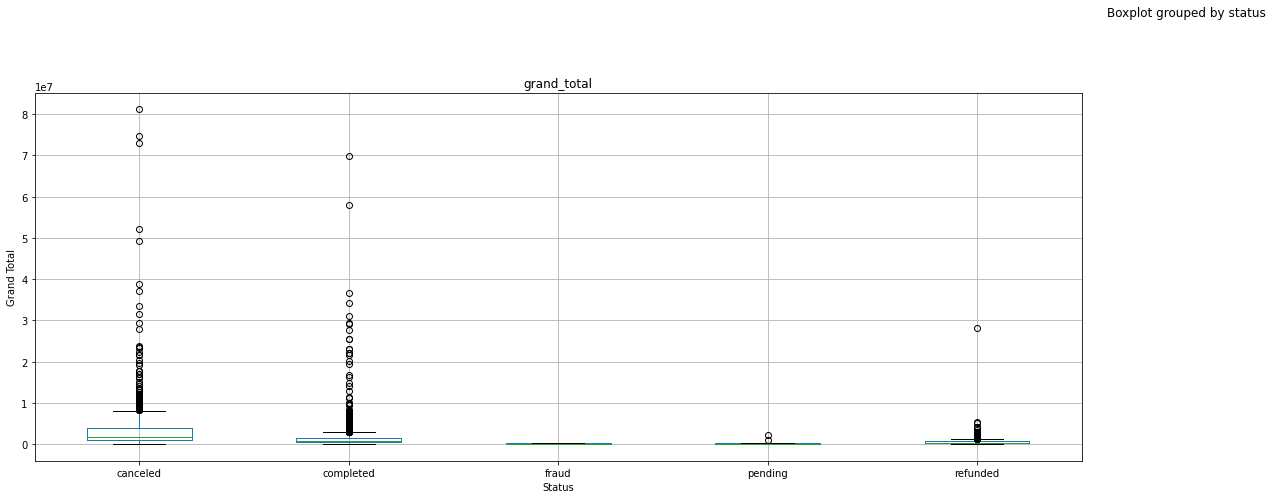

In [28]:
#to check how these categories are distibuted
dft=df.groupby(['created_at','status']).sum().reset_index()
fig = plt.figure(figsize=(40,15))
ax_1 = fig.add_subplot(221);
dft.boxplot(column='grand_total',by='status',ax=ax_1)
ax_1.set_xlabel("Status");
ax_1.set_ylabel("Grand Total");

Let's check the collective worth or grand total of all these status categories

In [29]:
dft=df1.groupby('status').sum().reset_index()

In [30]:
fig=px.bar(dft,x='status',y='grand_total',text='grand_total')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

Almost Rs. 2.9B of orders have been cancelled. Only orders of worth Rs. 1.6B have been completed.

We need to drop these cancelled orders to see the real picture

In [31]:
dft=df[df.status=='completed'].groupby('created_at').sum().reset_index()

In [32]:
fig=go.Figure()

fig.add_trace(go.Scatter(x=dft['created_at'],y=dft['grand_total'],mode='lines+markers',name='grand_total'))
fig.add_trace(go.Scatter(x=dft['created_at'],y=dft['discount_amount'],mode='lines+markers',name='discount_amount'))

Luckily the trend is preserved. There is indeed spikes in order with the increase in the discount amount.

## Categories

Now it is time to answer which category is hot and driven most audience.

In [33]:
dft=df.groupby('category_name_1').sum().reset_index()

In [34]:
fig=px.bar(dft,x='category_name_1',y='grand_total',text='grand_total')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

Seems like Mobiles & Tablets is the hottest category. But, we know, there is a huge chunk of cancelled orders. Let's check out of these orders, how many were cancelled or completed.

In [35]:
dft=df.groupby(['category_name_1','status']).sum().reset_index()

In [36]:
px.bar(dft,x='category_name_1',y='grand_total',color='status',barmode='group')

For almost every category, the number of orders that got canceled are greater than the one which got completed.

Let's check the yearly history to know which category has outshined each year.

<AxesSubplot:xlabel='Year', ylabel='category_name_1'>

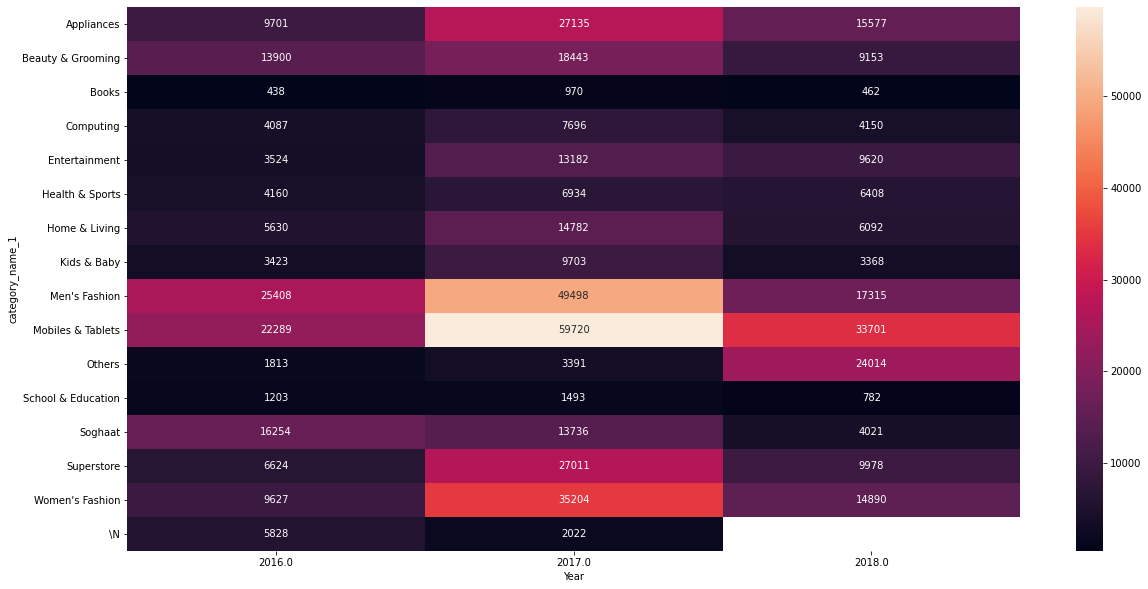

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(df.groupby(['Year','category_name_1']).size().unstack().T,annot=True,fmt='.0f')

Mobile phones and tablets is remained top throughout. Men's fashion is the second most famous category. 

let's check what percentage of completed orders have generated more revenue.

In [38]:
df1=df[df['status']=='completed'].groupby('category_name_1').size().reset_index(name='count')

In [39]:
df1['Percentage of Orders'] = df1['count']/np.sum(df1['count'])*100

In [40]:
df1['Revenue Generated']=df.groupby('category_name_1').sum()['grand_total'].values

In [41]:
df1['Percentage of Revenue'] = df1['Revenue Generated']/np.sum(df1['Revenue Generated'])*100

In [42]:
df1.sort_values(by='count',ascending=False,inplace=True)

In [43]:
fig=go.Figure()
fig.add_trace(go.Bar(x=df1['category_name_1'],y=df1['Percentage of Orders'],name='Orders',text=df1['Percentage of Orders']))
fig.add_trace(go.Bar(x=df1['category_name_1'],y=df1['Percentage of Revenue'],name='Revenue',text=df1['Percentage of Revenue']))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title='Percentage of Successful orders and genrated revenue',xaxis_title='Categories',yaxis_title='Percentage',
                  uniformtext_minsize=8, uniformtext_mode='hide')

The top categories with the completed orders in terms of number of orders are:

In [44]:
px.pie(df1.sort_values(by='category_name_1',ascending=False),values='count',names='category_name_1',title='Category share by volume')

The top categories with the completed orders are:

In [45]:
dft[dft.status == 'completed'].set_index('category_name_1')['grand_total'].sort_values(ascending=False)

category_name_1
Mobiles & Tablets     6.131490e+08
Appliances            2.370856e+08
Entertainment         1.928798e+08
Women's Fashion       1.457730e+08
Men's Fashion         8.901637e+07
Superstore            6.067131e+07
Others                5.879390e+07
Beauty & Grooming     5.013202e+07
Computing             4.909160e+07
Home & Living         4.206294e+07
Soghaat               2.649809e+07
Kids & Baby           2.176329e+07
Health & Sports       2.158192e+07
\N                    1.869671e+07
School & Education    3.282045e+06
Books                 1.621492e+06
Name: grand_total, dtype: float64

#### Conclusion:
Top Categories by volume:
- Men's Fashion
- Mobiles & Tablets
- Women's Fashion

Top Categories by generated Revenue:
- Mobiles & Tablets
- Appliances
- Entertainment

Since the Mobile & Tablets appear on both list this category is both lucerative and famous among buyers. Startups can focus on providing selling online mobile phones and tablets.

## Payment Methods

In [46]:
dft=df.groupby('payment_method')['grand_total'].sum().reset_index()

In [47]:
fig=px.bar(dft,x='payment_method',y='grand_total',text='grand_total')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

## Quantity Ordered

For this, we will get rid of all the canceled orders.

In [48]:
df_clean=df[df.status != 'canceled']

In [49]:
dft = df_clean.groupby(['created_at' ,'category_name_1', 'status'])['qty_ordered'].sum().reset_index()
px.scatter(dft, x="created_at", y="qty_ordered", color="status", size="qty_ordered", hover_data=['category_name_1','status'])

On March 28, 2018 the maximum number of orders have been completed.

## Payment method and Status

Since we have 16 unique status options and 18 unique payment_method, it is better to create a matrix to show the correlation then to create graphs.

In [50]:
dftt=df.groupby(['payment_method','status']).size().reset_index(name='count')

In [51]:
px.bar(dftt,x='payment_method',y='count',color='status',title='Payment Method with their Order Status')

<AxesSubplot:xlabel='payment_method', ylabel='status'>

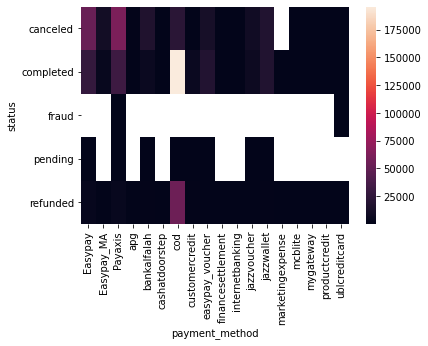

In [52]:
sns.heatmap(df.pivot_table(index=['status'],columns=['payment_method'],values='item_id',aggfunc='count'))

This tells Cash On Delivery is the best option for the customers. It has strong correlation with the completed order. However, it is not perfect. It too have relatively high refund and cancellation rate than other payment methods.

Let's explore how the payment trends of people have been changed through years. Have people really shifted towards digital payment options?

In [53]:
df['Year'].value_counts()

2017.0    290920
2018.0    159695
2016.0    133909
Name: Year, dtype: int64

In [54]:
dft=df.groupby(['Year','payment_method']).size().reset_index(name='count')

In [55]:
px.bar(dft,x='Year',y='count',color='payment_method',title='Yearly Categorization of Payment Methods')

The trend is not too much visible, let's split the data into two categories of either digital payment or cod.

In [56]:
dft=df.replace(np.delete(df['payment_method'].unique(),0),'digital_payment')

In [57]:
dftt=dft.groupby(['Year','payment_method']).size().reset_index(name='count')

In [58]:
px.bar(dftt,x='Year',y='count',color='payment_method',title='Year wise Digital and COD trends')

In [59]:
#by market size
dftt=dft.groupby(['Year','payment_method']).sum()['grand_total'].reset_index(name='volume')

In [60]:
px.bar(dftt,x='Year',y='volume',color='payment_method',title='Yearly Revenue Generated by Digital and COD')

In [61]:
dftt

Year   payment_method        volume
0  2016.0              cod  2.356997e+08
1  2016.0  digital_payment  4.098855e+08
2  2017.0              cod  5.891975e+08
3  2017.0  digital_payment  1.658068e+09
4  2018.0              cod  2.405168e+08
5  2018.0  digital_payment  1.852984e+09

Indeed. People have developed more trust on digital methods over years. But to comment on this growth we need to check whether this growth has more completed orders or canceled ones.

In [62]:
dftt=dft.groupby(['payment_method','status']).size().reset_index(name='count')

In [63]:
px.bar(dftt,x='payment_method',y='count',color='status',title='Payment Method and associated Order Status')

We feared right. Digital payments have more cancellation ratio. This may attribute to the payment integration issues that the ecommerce stores may have faced.

This too much cancellation rate has pushed me to attempt to analyze the yearly revenue lost due to these cancelled orders.

In [64]:
dftt=dft.groupby(['Year','status']).sum()['grand_total'].reset_index(name='count')

In [65]:
px.bar(dftt,x='Year',y='count',color='status',title='Yearly Order Status Trends')

Shoot! there is a huge amount of revenue lose associated with cancelled orders. It even reached to Rs. 1.6B in the year 2017. However, the revenue has became 4-fold from the year 2016 to 2017.

Great. It is worth exploring the successful order by all payment methods.

In [66]:
dftt=df[df['status']=='completed'].groupby(['Year','payment_method']).sum()['grand_total'].reset_index()

In [67]:
px.bar(dftt,x='Year',y='grand_total',color='payment_method',title='Yearly Payment Methods and Providers')

Cod, Easypay and easypay voucher are the major contributor of revenue.

#### Conclusion:
The category with the most number of completed orders is COD (Cash on delivery). There is a increasing trend of trust for digital payment methods among people. However, digital methods have more cancellation rate. 

## Predicting Future Sales & Trends

In [93]:
#let's import statistics libraries
from math import sqrt
import statsmodels.api as sm
#from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools  import adfuller
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acovf, acf
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings('ignore')

In [94]:
dt=df.copy()
dt['created_at']=pd.to_datetime(dt['created_at'])
dt = dt.sort_values('created_at')
#Adding New Features
dtg = dt.groupby('created_at')['grand_total'].sum().reset_index()
dtq = dt.groupby('created_at')['qty_ordered'].sum().reset_index()
dtd = dt.groupby('created_at')['discount_amount'].sum().reset_index()
#Comput count for non numeric values
dts = dt.groupby('created_at')['sku'].count().reset_index() 
dtst = dt.groupby('created_at')['status'].count().reset_index()
# new data set
p = pd.DataFrame(dtg) 
p['qty_ordered'] = dtq['qty_ordered']
p['discount_amount'] = dtd['discount_amount']
p['sku'] = dts['sku']
p['status'] = dtst['status']
#Cumulative Sum
p['cum_grand_total'] = p['grand_total'].cumsum()
p['cum_qty_ordered'] = p['qty_ordered'].cumsum()
p['cum_discount_amount'] = p['discount_amount'].cumsum()
p['cum_sku_cnt'] = p['sku'].cumsum()
p['cum_status_cnt'] = p['status'].cumsum()
# Date features
p['Dateofmonth'] = p['created_at'].dt.day
p['Month'] = p['created_at'].dt.month
p['Week'] = p['created_at'].dt.week
p['Dayofweek'] = p['created_at'].dt.dayofweek # 0 = monday.
p['Weekdayflg'] = (p['Dayofweek'] // 5 != 1).astype(float)
p['Month'] = p['created_at'].dt.month
p['Quarter'] = p['created_at'].dt.quarter
p['Dayofyear'] = p['created_at'].dt.dayofyear

In [95]:
p.head()

created_at  grand_total  qty_ordered  discount_amount  sku  status  \
0 2016-07-01   1301026.75        621.0           8100.0  547     547   
1 2016-07-02   1408450.48        301.0           2502.0  260     260   
2 2016-07-03   2215490.88        264.0           1501.0  210     210   
3 2016-07-04   1094080.25        263.0           4406.0  229     229   
4 2016-07-05    913053.50        194.0           5230.0  168     168   

   cum_grand_total  cum_qty_ordered  cum_discount_amount  cum_sku_cnt  \
0       1301026.75            621.0               8100.0          547   
1       2709477.23            922.0              10602.0          807   
2       4924968.11           1186.0              12103.0         1017   
3       6019048.36           1449.0              16509.0         1246   
4       6932101.86           1643.0              21739.0         1414   

   cum_status_cnt  Dateofmonth  Month  Week  Dayofweek  Weekdayflg  Quarter  \
0             547            1      7    26          4         1.0        3   
1             807            2      7    26          5         0.0        3   
2            1017            3      7    26          6         0.0        3   
3            1246            4      7    27          0         1.0        3   
4            1414            5      7    27          1         1.0        3   

   Dayofyear  
0        183  
1        184  
2        185  
3        186  
4        187

Let's create a subset for sales prediction.

In [96]:
#selecting first two column
p = p.iloc[:, 0:2]  
p.head()

created_at  grand_total
0 2016-07-01   1301026.75
1 2016-07-02   1408450.48
2 2016-07-03   2215490.88
3 2016-07-04   1094080.25
4 2016-07-05    913053.50

In [97]:
#Converting this column to datetime
p['created_at'] = pd.to_datetime(p['created_at'],format='%Y-%m-%d')

In [98]:
#Accessing any specific date
p.loc[1, 'created_at'].day_name()
#We can also convert dates into days
p['created_at'].dt.day_name()

0        Friday
1      Saturday
2        Sunday
3        Monday
4       Tuesday
         ...   
784      Friday
785    Saturday
786      Sunday
787      Monday
788     Tuesday
Name: created_at, Length: 789, dtype: object

In [99]:
#For Time Series,Date column must be in indexes
p = p.set_index('created_at')
from datetime import datetime
p.head()

grand_total
created_at             
2016-07-01   1301026.75
2016-07-02   1408450.48
2016-07-03   2215490.88
2016-07-04   1094080.25
2016-07-05    913053.50

In [100]:
#Checking Dataset is stationary or not
results = adfuller(p['grand_total'])
print(results)

(-6.759093833685843, 2.822080301573161e-09, 7, 781, {'1%': -3.438750669890019, '5%': -2.8652477937238703, '10%': -2.56874438754281}, 26827.998974677746)


#### Conclusion:
Here the first value is (-6.75) which shows test Statistic (More negative it is more stationary dataset will be)

Here 2nd value is (2.82 e-09) which shows P-value (More negative p-value in data is considered as more stationary)


Following conditions must be fulfilled for making dataset stationary:
1. Test Statistics needed to be below -2.91 
2. Test Statistics has less value than critical value at 5%
3.  P-value is less than 0.5

In [101]:
#We can also print p-value,Test statistics and Critical values as follows
results = adfuller(p['grand_total'])
print('Test Statistics: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values: ')
for key, value in results[4].items():
    print('\t%s: %.3f' % (key,value))

Test Statistics: -6.759094
p-value: 0.000000
Critical Values: 
	1%: -3.439
	5%: -2.865
	10%: -2.569


As dataset is Stationary but we can improve its stationarity by using following techniques:

1. Difference with diff()
2. Log
3. Substracting previous value with Shift()
4. Differencing Simple Moving Average
5. Seasonal Decomposition

#### 1.Difference with diff()

In [102]:
#1.Difference with diff()
df_stationary = p.diff().dropna()
result = adfuller(df_stationary)
print(result)

(-9.88055046663683, 3.7801923391715306e-17, 18, 769, {'1%': -3.438882201132452, '5%': -2.865305765357574, '10%': -2.568775270215655}, 26830.666943617704)


#### 2. Log

In [103]:
indexeddataset_logscale = np.log(p['grand_total'])
result = adfuller(indexeddataset_logscale)
print(result)

(-5.8807990782592725, 3.081783989961599e-07, 7, 781, {'1%': -3.438750669890019, '5%': -2.8652477937238703, '10%': -2.56874438754281}, 1449.2854299497012)


#### 3.Substracting previous value with Shift()

In [104]:
datasetLogDiffShifting = indexeddataset_logscale - indexeddataset_logscale.shift()
datasetLogDiffShifting.dropna(inplace=True)
result = adfuller(datasetLogDiffShifting)
print(result)

(-8.581567042024133, 7.70333630234154e-14, 20, 767, {'1%': -3.4389045244994096, '5%': -2.8653156040031176, '10%': -2.5687805115003}, 1462.400094333268)


#### 4.Differencing Simple Moving Average

In [105]:
movingaverage = indexeddataset_logscale.rolling(window=12).mean()
movingstd = indexeddataset_logscale.rolling(window=12).std()
datasetlogscaleminusmovingaverage = indexeddataset_logscale - movingaverage
datasetlogscaleminusmovingaverage.dropna(inplace=True)
result = adfuller(datasetlogscaleminusmovingaverage)
print(result)

(-10.696900033271323, 3.605348312429432e-19, 9, 768, {'1%': -3.4388933482333464, '5%': -2.8653106782623574, '10%': -2.5687778874376086}, 1314.665767332042)


#### Differencing Simple Moving Average Provides us most suitable P-value and Test statistics

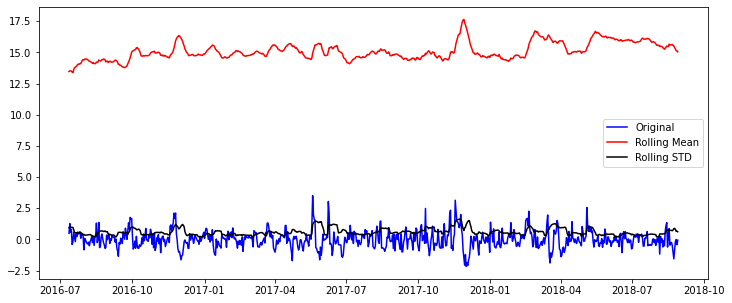

In [109]:
plt.figure(figsize=(12,5))
plot = plt.plot(datasetlogscaleminusmovingaverage,color='blue',label='Original')
mean = plt.plot(movingaverage, color='red',label='Rolling Mean')
std = plt.plot(movingstd, color='Black',label='Rolling STD')
plt.legend(loc='best')
#plt.title()
plt.show(block=True)

#### 5. Seasonal Decomposition

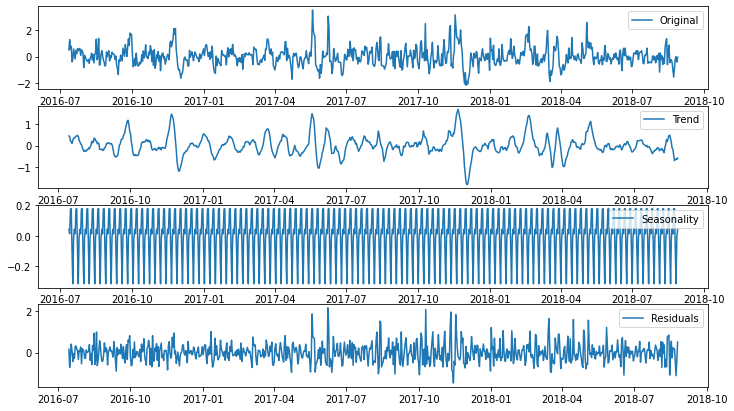

In [111]:
#By using this,we can find Seasonality,trends and residuals.
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(datasetlogscaleminusmovingaverage)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(12,7))
plt.subplot(411)
plt.plot(datasetlogscaleminusmovingaverage, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')

In [112]:
datasetlogscaleminusmovingaverage.head()

created_at
2016-07-12    0.492259
2016-07-13    1.277309
2016-07-14    0.575696
2016-07-15    0.784320
2016-07-16   -0.402845
Name: grand_total, dtype: float64

In [113]:
#Converting above from Series to dataframe
datasetlogscaleminusmovingaverage = pd.Series(datasetlogscaleminusmovingaverage)
new_dataset = datasetlogscaleminusmovingaverage.to_frame()
new_dataset.head()

grand_total
created_at             
2016-07-12     0.492259
2016-07-13     1.277309
2016-07-14     0.575696
2016-07-15     0.784320
2016-07-16    -0.402845

### Arima Model

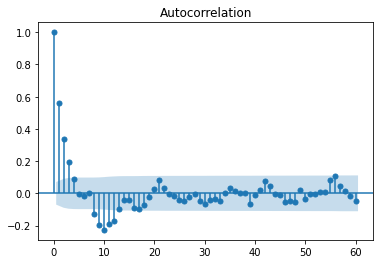

In [114]:
#Autocorrelation
ecom_df = new_dataset
acf(ecom_df, fft=False)
sm.graphics.tsa.plot_acf(ecom_df.values.squeeze(), lags=60);

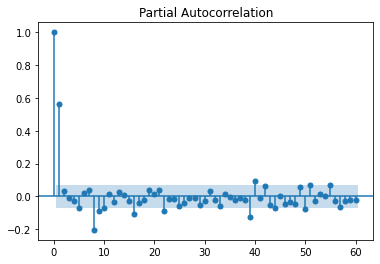

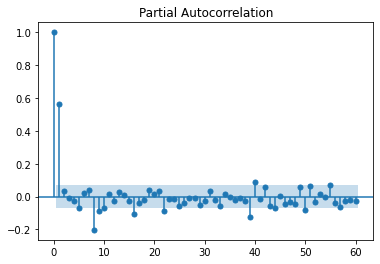

In [115]:
sm.graphics.tsa.plot_pacf(ecom_df.values.squeeze(), lags=60,
                          method='ywunbiased');

sm.graphics.tsa.plot_pacf(ecom_df.values.squeeze(), lags=60,
                         method='ols');

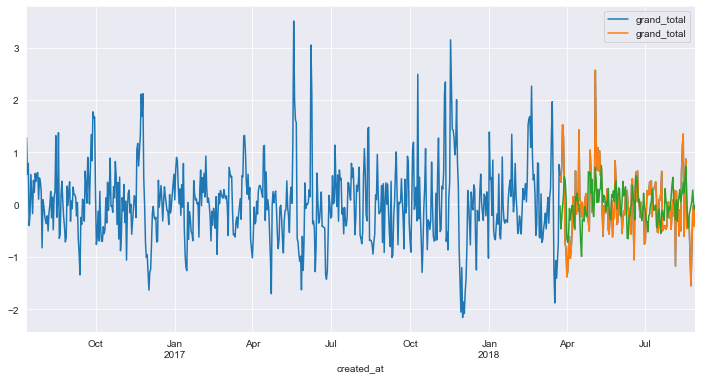

In [116]:
# Change frequency to day
ecom_df = new_dataset.asfreq('d')

# Set style for seaborn plot
sns.set_style('darkgrid')

# Add automatic datetime converters
pd.plotting.register_matplotlib_converters()

# Default figure size
sns.mpl.rc('figure',figsize=(12, 6))

# Plot daily max temps
fig, ax = plt.subplots()
ax = ecom_df.plot(ax=ax)

# Creating model 
model = AutoReg(ecom_df['grand_total'],30)
model_fit = model.fit()

# Define training and testing area
len(ecom_df) # 778 observations
train_df = ecom_df.iloc[:620] 
test_df = ecom_df.iloc[620:] 

# Define training model for 159 days 
train_model = AutoReg(ecom_df['grand_total'], 159).fit(cov_type="HC0")

# Define start and end for prediction 
start = len(train_df)
end = len(train_df) + len(test_df) - 1
prediction = train_model.predict(start=start, end=end, dynamic=True)
# Plot testing data with prediction
ax = test_df.plot(ax=ax) # Orange
ax = prediction.plot(ax=ax) # Green

### Predicting Daily Sales

<AxesSubplot:xlabel='created_at'>

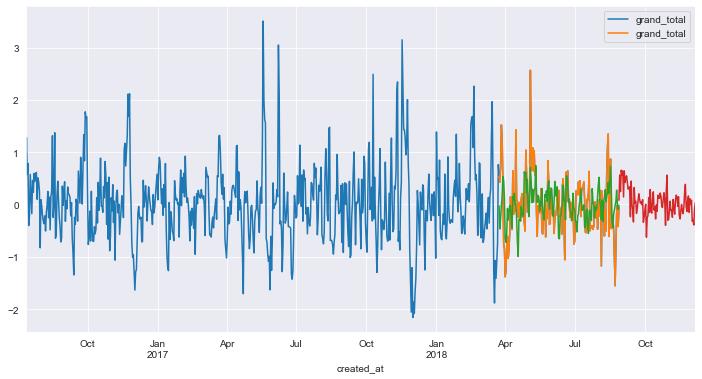

In [117]:
sns.mpl.rc('figure',figsize=(12, 6))
fig, ax = plt.subplots()
ax = ecom_df.plot(ax=ax)
model = AutoReg(ecom_df['grand_total'], 30)
model_fit = model.fit()
len(ecom_df) # 778 observations
train_df = ecom_df.iloc[:620] # 80%
test_df = ecom_df.iloc[620:] # Last 20%
# Define training model for 159 days 
train_model = AutoReg(ecom_df['grand_total'], 159).fit(cov_type="HC0")
start = len(train_df)
end = len(train_df) + len(test_df) - 1
prediction = train_model.predict(start=start, end=end, dynamic=True)
ax = test_df.plot(ax=ax) 
ax = prediction.plot(ax=ax) 

# Predict 100 days into the future
forecast = train_model.predict(start=end, end=end+100, dynamic=True)
forecast.plot(ax=ax) 

##### Legend:
1. Red line shows predictions
2. Green Line shows training part of Dataset
3. Orange Line shows Test part of Dataset

In [118]:
mean_absolute_error(test_df, prediction)

0.4341050302371633

In [119]:
ecom_df = new_dataset.asfreq('m')
ecom_df.head()

grand_total
created_at             
2016-07-31    -0.829195
2016-08-31     0.264442
2016-09-30     1.672717
2016-10-31    -0.607812
2016-11-30    -0.960756

### Predicting Monthly Sales

<AxesSubplot:xlabel='created_at'>

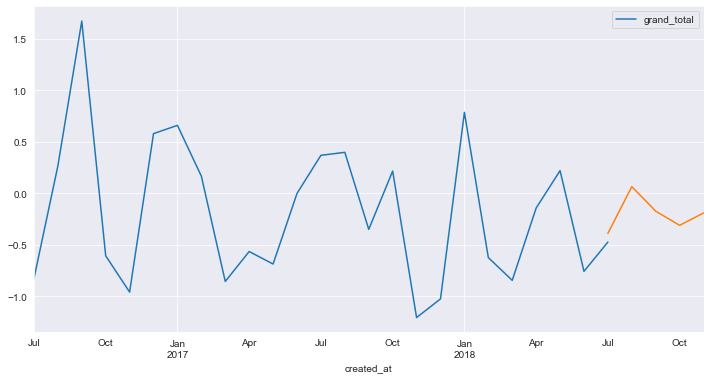

In [121]:
# Set style for seaborn plot
sns.set_style('darkgrid')

# Add automatic datetime converters
pd.plotting.register_matplotlib_converters()

# Default figure size
sns.mpl.rc('figure',figsize=(12, 6))

# Plot monthly max temps
fig, ax = plt.subplots()
ax = ecom_df.plot(ax=ax)

# Creating model 
model = AutoReg(ecom_df['grand_total'],10)
model_fit = model.fit()

# Define training and testing area
len(ecom_df) # 25 observations
train_df = ecom_df.iloc[:16] 
test_df = ecom_df.iloc[16:] 

# Define training model for 5 days 
train_model = AutoReg(ecom_df['grand_total'], 5).fit(cov_type="HC0")

# Define start and end for prediction 
start = len(train_df)
end = len(train_df) + len(test_df) - 1
prediction = train_model.predict(start=start, end=end, dynamic=True)

# Predict 4 months into the future
forecast = train_model.predict(start=end, end=end+4, dynamic=True)
forecast.plot(ax=ax)

In [122]:
mean_absolute_error(test_df, prediction)

0.5711547918280941

## Sarimax Model

In [123]:
new_dataset = datasetlogscaleminusmovingaverage.to_frame()
ecom_df = new_dataset.asfreq('d')
ecom_df.head()

grand_total
created_at             
2016-07-12     0.492259
2016-07-13     1.277309
2016-07-14     0.575696
2016-07-15     0.784320
2016-07-16    -0.402845

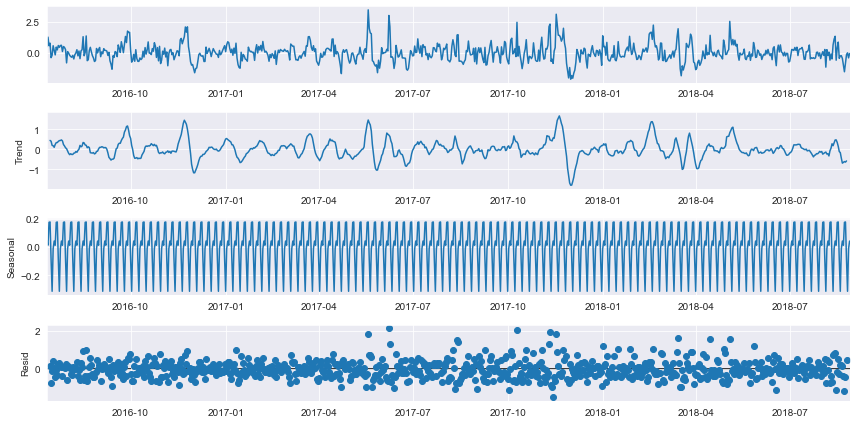

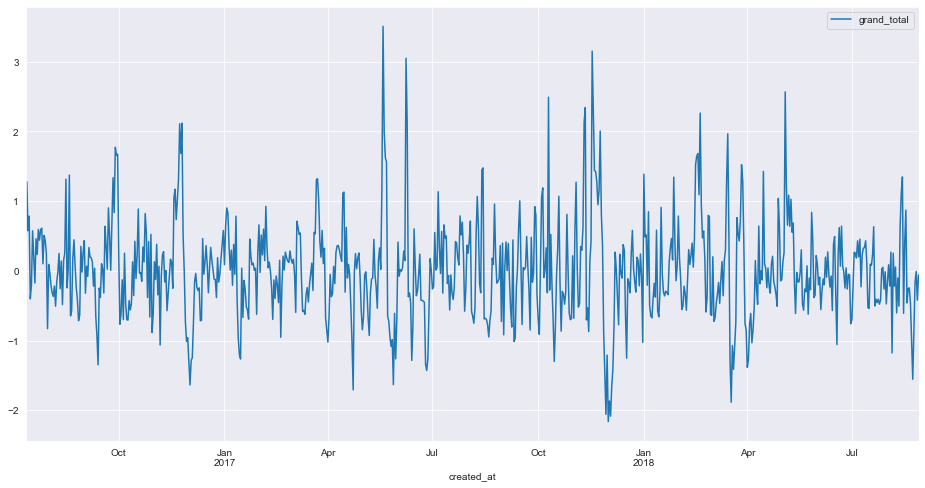

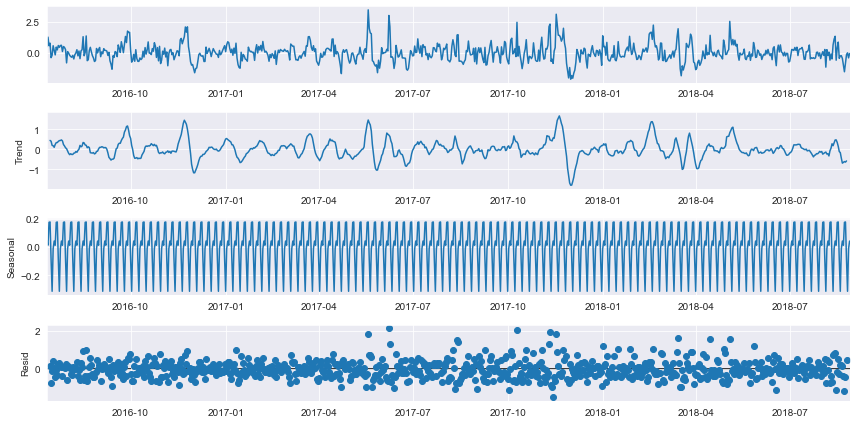

In [124]:
ecom_df.plot(figsize=(16,8))
# We verify that there is a seasonal component
res = seasonal_decompose(ecom_df, model='add')
res.plot()

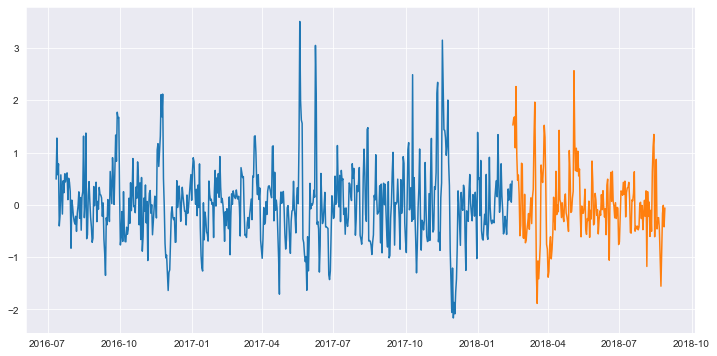

In [126]:
train_df = ecom_df.iloc[:583] # 80%
test_df = ecom_df.iloc[583:] # 20%
model = SARIMAX(train_df, order=(0, 1, 3),
               seasonal_order=(1, 0, 1, 12))
res = model.fit()
start = len(train_df)
end = len(train_df) + len(test_df) - 1
forecast = res.predict(start, end )
forecast = pd.DataFrame(forecast,index = test_df.index,columns=['Prediction'])
plt.plot(train_df, label='Train')
plt.plot(test_df, label='Test')
plt.plot(forecast, label='Prediction')
plt.show()

<AxesSubplot:xlabel='created_at'>

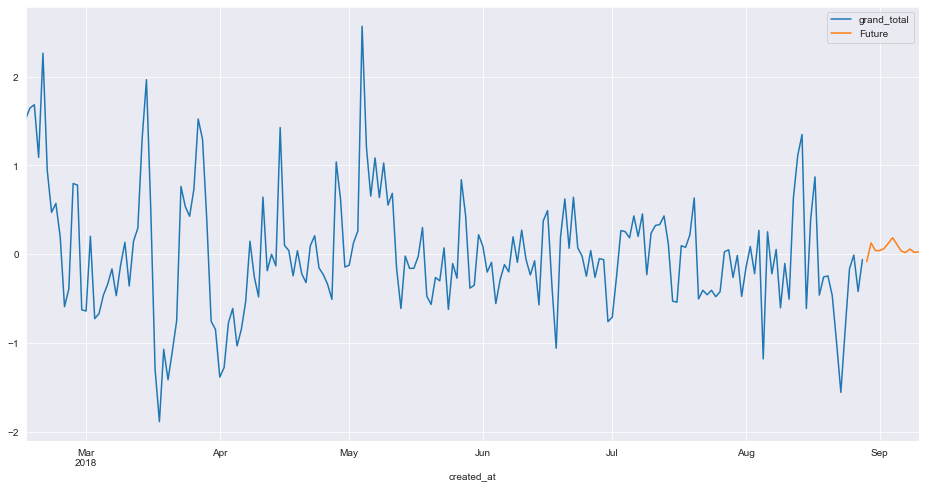

In [127]:
# Predict the future
model = SARIMAX(ecom_df, order=(0, 1, 3),
               seasonal_order=(1, 0, 1, 12))
res = model.fit()
future = res.predict(len(ecom_df), len(ecom_df)+12, 
                    typ='levels').rename('Future')
test_df.plot(legend=True, figsize=(16,8))
future.plot(legend=True)

#### Conclusion:
This SARIMAX model worked slighlty better than the above Arimax model

## Trends

In [129]:
#let's find the overall trend
dt = dt.sort_values('created_at')
#Adding New Features
dtg = dt.groupby('created_at')['grand_total'].sum().reset_index()
dtq = dt.groupby('created_at')['qty_ordered'].sum().reset_index()
dtd = dt.groupby('created_at')['discount_amount'].sum().reset_index()
#Comput count for non numeric values
dts = dt.groupby('created_at')['sku'].count().reset_index() 
dtst = dt.groupby('created_at')['status'].count().reset_index()
# new data set
p = pd.DataFrame(dtg) 
p['qty_ordered'] = dtq['qty_ordered']
p['discount_amount'] = dtd['discount_amount']
p['sku'] = dts['sku']
p['status'] = dtst['status']
#Cumulative Sum
p['cum_grand_total'] = p['grand_total'].cumsum()
p['cum_qty_ordered'] = p['qty_ordered'].cumsum()
p['cum_discount_amount'] = p['discount_amount'].cumsum()
p['cum_sku_cnt'] = p['sku'].cumsum()
p['cum_status_cnt'] = p['status'].cumsum()
# Date features
p['Dateofmonth'] = p['created_at'].dt.day
p['Month'] = p['created_at'].dt.month
p['Week'] = p['created_at'].dt.week
p['Dayofweek'] = p['created_at'].dt.dayofweek # 0 = monday.
p['Weekdayflg'] = (p['Dayofweek'] // 5 != 1).astype(float)
p['Month'] = p['created_at'].dt.month
p['Quarter'] = p['created_at'].dt.quarter
p['Dayofyear'] = p['created_at'].dt.dayofyear

p.head()

created_at  grand_total  qty_ordered  discount_amount  sku  status  \
0 2016-07-01   1301026.75        621.0           8100.0  547     547   
1 2016-07-02   1408450.48        301.0           2502.0  260     260   
2 2016-07-03   2215490.88        264.0           1501.0  210     210   
3 2016-07-04   1094080.25        263.0           4406.0  229     229   
4 2016-07-05    913053.50        194.0           5230.0  168     168   

   cum_grand_total  cum_qty_ordered  cum_discount_amount  cum_sku_cnt  \
0       1301026.75            621.0               8100.0          547   
1       2709477.23            922.0              10602.0          807   
2       4924968.11           1186.0              12103.0         1017   
3       6019048.36           1449.0              16509.0         1246   
4       6932101.86           1643.0              21739.0         1414   

   cum_status_cnt  Dateofmonth  Month  Week  Dayofweek  Weekdayflg  Quarter  \
0             547            1      7    26          4         1.0        3   
1             807            2      7    26          5         0.0        3   
2            1017            3      7    26          6         0.0        3   
3            1246            4      7    27          0         1.0        3   
4            1414            5      7    27          1         1.0        3   

   Dayofyear  
0        183  
1        184  
2        185  
3        186  
4        187

In [130]:
trend_df = p.iloc[:, 0:2]  
trend_df.head()

created_at  grand_total
0 2016-07-01   1301026.75
1 2016-07-02   1408450.48
2 2016-07-03   2215490.88
3 2016-07-04   1094080.25
4 2016-07-05    913053.50

In [131]:
#Creating another column
trend_df['Year_month'] = trend_df['created_at'].apply(lambda x: x.strftime('%Y-%m'))
trend_df.head()

created_at  grand_total Year_month
0 2016-07-01   1301026.75    2016-07
1 2016-07-02   1408450.48    2016-07
2 2016-07-03   2215490.88    2016-07
3 2016-07-04   1094080.25    2016-07
4 2016-07-05    913053.50    2016-07

In [132]:
#Grouping Month Year
trend_df = trend_df.groupby('Year_month').sum()['grand_total'].reset_index()

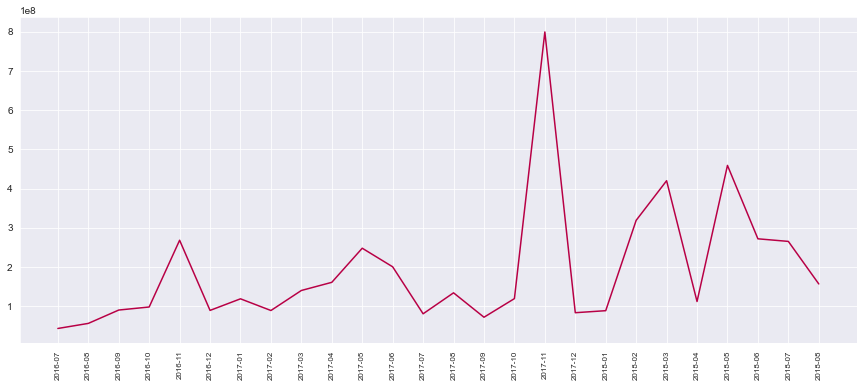

In [133]:
plt.figure(figsize=(15,6))
plt.plot(trend_df['Year_month'],trend_df['grand_total'],color='#b80045')
plt.xticks(rotation='vertical',size=8)
plt.show()

#### Conclusion:
We observe overall trend from july-2016 to aug-2018 and concluded following points:
1. Purchases increases in last Three months ( October,November and December ) of 2016 and 2017
2. Most e-commerce buyers purchases products in November
3. November is most suitable month for sellers to market their products
4. Overall volume of ecommerce sales is increasing year by year 
5. For example, you can compare first six months of 2017 with 2018